Step 1: Define the Problem Statement
Objective:
Predict Coca-Cola's stock prices (e.g., Close price) and analyze trends.
Dataset:
Download historical stock data from Yahoo Finance.
Deliverables:
Exploratory Data Analysis (EDA): Insights from the data using visualizations and statistics.
Machine Learning Model: To predict future stock prices.
Live-updating Prediction System: Fetching real-time stock data and making predictions.


Step 2: Data Collection
We will use the Yahoo Finance API to fetch stock data

In [1]:
import yfinance as yf
import pandas as pd

# Fetch Coca-Cola stock data
ticker = 'KO'  # Coca-Cola stock ticker
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')

# Reset index for easier handling
data.reset_index(inplace=True)

# Display data structure
print(data.info())
print(data.head())


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2264 non-null   datetime64[ns]
 1   (Close, KO)   2264 non-null   float64       
 2   (High, KO)    2264 non-null   float64       
 3   (Low, KO)     2264 non-null   float64       
 4   (Open, KO)    2264 non-null   float64       
 5   (Volume, KO)  2264 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 106.3 KB
None
Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.662107  30.851291  30.414715  30.749422   9921100
1      2015-01-05  30.662107  31.266037  30.618452  31.062301  26292600
2      2015-01-06  30.894960  31.244220  30.734885  30.858580  16897500
3      2015-01-07  31.280607  31.367921  30.982281  31.142

Step 3: Data Cleaning
Handling missing values to ensure data quality

In [3]:
# Check for missing values
print(data.isnull().sum())

# Fill missing numerical values with forward fill method
data.ffill(inplace=True)

# Replace remaining missing values (e.g., dividends/splits) with 0
data.fillna(0, inplace=True)

# Confirm no missing values remain
print(data.isnull().sum())


Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64
Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64


Step 4: Feature Engineering
We will create new features like:

Moving Averages: 20-day and 50-day for trend detection.
Daily Returns: Helps capture volatility.
Volatility: Standard deviation over a rolling window.

In [4]:
# Add Moving Averages
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Add Daily Returns
data['Daily_Return'] = data['Close'].pct_change()

# Add Volatility
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

# Drop rows with NA due to rolling calculations
data.dropna(inplace=True)

print(data.head())


Price        Date      Close       High        Low       Open    Volume  \
Ticker                    KO         KO         KO         KO        KO   
49     2015-03-16  29.559259  29.603277  29.339161  29.346497  15238800   
50     2015-03-17  29.720665  29.882072  29.581270  29.838051  21661800   
51     2015-03-18  29.786697  29.926095  29.199768  29.698659  26247500   
52     2015-03-19  29.361170  29.728001  29.317149  29.698654  16057600   
53     2015-03-20  29.823381  29.830717  29.353835  29.397856  31608500   

Price       MA_20      MA_50 Daily_Return Volatility  
Ticker                                                
49      30.412253  30.668404     0.009521   0.011377  
50      30.377187  30.649575     0.005460   0.011464  
51      30.348333  30.632067     0.002222   0.011486  
52      30.284377  30.601391    -0.014286   0.011604  
53      30.248625  30.572246     0.015742   0.012260  


Step 5: Exploratory Data Analysis (EDA)

5.1 Summary Statistics


In [5]:
# Summary statistics
print(data.describe())


Price                            Date        Close         High          Low  \
Ticker                                          KO           KO           KO   
count                            2215  2215.000000  2215.000000  2215.000000   
mean    2019-08-06 07:49:22.889390592    42.987010    43.282485    42.686535   
min               2015-03-16 00:00:00    28.101780    28.494473    27.043996   
25%               2017-05-24 12:00:00    34.694345    34.913757    34.470565   
50%               2019-08-07 00:00:00    40.891720    41.240370    40.536929   
75%               2021-10-16 12:00:00    50.886597    51.205603    50.619402   
max               2023-12-29 00:00:00    60.956146    61.867589    60.722541   
std                               NaN     9.549088     9.626279     9.465687   

Price          Open        Volume        MA_20        MA_50 Daily_Return  \
Ticker           KO            KO                                          
count   2215.000000  2.215000e+03  2215.000000 

5.2 Data Visualization

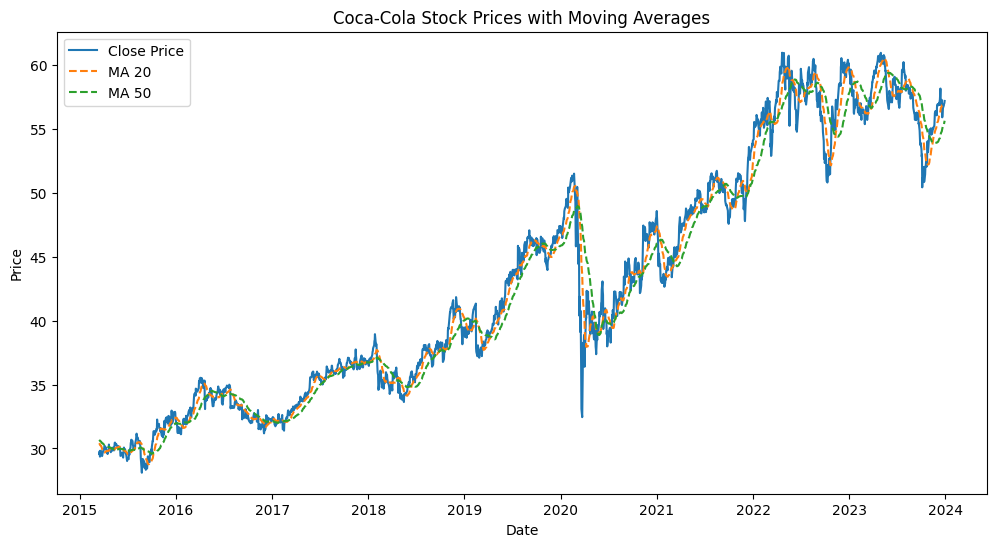

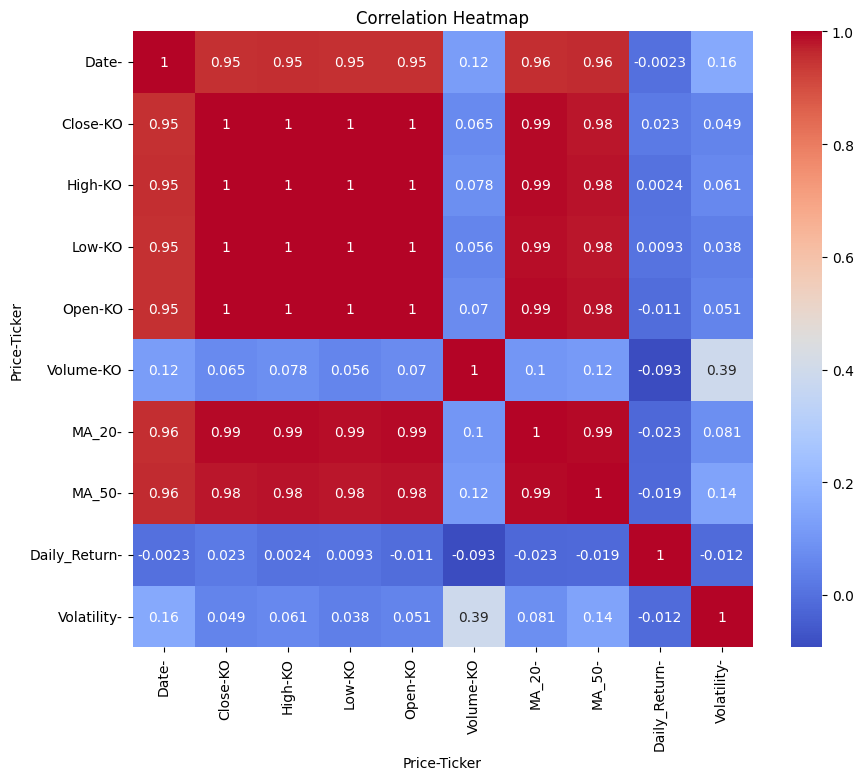

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA_20'], label='MA 20', linestyle='--')
plt.plot(data['Date'], data['MA_50'], label='MA 50', linestyle='--')
plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Step 6: Data Splitting
We split the dataset into training (80%) and testing (20%) sets

In [8]:
from sklearn.model_selection import train_test_split

# Check available columns
print("Available columns:", data.columns.tolist())

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'

# Select only existing features
existing_features = [col for col in features if col in data.columns]

# Check if target exists
if target not in data.columns:
    raise KeyError(f"Target column '{target}' not found in the dataset!")

# Select data
X = data[existing_features]
y = data[target]

# Split data (time-series split, no shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Available columns: [('Date', ''), ('Close', 'KO'), ('High', 'KO'), ('Low', 'KO'), ('Open', 'KO'), ('Volume', 'KO'), ('MA_20', ''), ('MA_50', ''), ('Daily_Return', ''), ('Volatility', '')]
Training set: (1772, 8), Test set: (443, 8)


Step 7: Model Training
We will use Random Forest Regressor as a baseline model.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Ensure no missing values
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

# Convert y_train to 1D array
y_train = y_train.values.ravel()  # Fix for the warning

# Initialize the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Squared Error (MSE): 2.6162
Root Mean Squared Error (RMSE): 1.6175
Mean Absolute Error (MAE): 1.1595


Step 8: Live Prediction System

In [12]:
import yfinance as yf

# Define stock ticker (e.g., 'AAPL' for Apple)
ticker = "AAPL"

# Fetch latest stock data
live_data = yf.download(ticker, period='1d', interval='1m')

# Calculate additional features
live_data['MA_20'] = live_data['Close'].rolling(window=20).mean()
live_data['MA_50'] = live_data['Close'].rolling(window=50).mean()
live_data['Daily_Return'] = live_data['Close'].pct_change()
live_data['Volatility'] = live_data['Daily_Return'].rolling(window=20).std()

# Fill missing values
live_data.fillna(0, inplace=True)

# Define features (remove 'Dividends' and 'Stock Splits' since they're unavailable in minute data)
features = ['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']

# Select only existing columns
existing_features = [col for col in features if col in live_data.columns]

# Ensure there's at least one valid row for prediction
if len(live_data) == 0:
    raise ValueError("Live data is empty. Check ticker symbol or API response.")

# Extract the latest row for prediction
latest_features = live_data[existing_features].iloc[-1:].dropna()

# Make sure latest_features is not empty before predicting
if latest_features.empty:
    raise ValueError("No valid data for prediction. Check if the stock market is open.")

# Make prediction
live_prediction = model.predict(latest_features)
print(f"Predicted Closing Price: {live_prediction[0]}")


[*********************100%***********************]  1 of 1 completed

Predicted Closing Price: 57.021841049194336


Step 9: Deploy the System

In [14]:
import streamlit as st
import yfinance as yf
import pandas as pd

st.title('Coca-Cola Stock Price Prediction')

# Fetch stock data
ticker = "KO"
data = yf.download(ticker, period="6mo", interval="1d")

# Reset index to remove MultiIndex issues
data.reset_index(inplace=True)

# Add technical indicators
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Fill missing values
data.fillna(0, inplace=True)

# Ensure only existing columns are selected
existing_columns = [col for col in ['Close', 'MA_20', 'MA_50'] if col in data.columns]

# Check if required columns exist
if not existing_columns:
    st.error("Required columns are missing. Check data format.")
else:
    # Plot line chart
    st.line_chart(data[existing_columns])

# Ensure `live_prediction` exists
if 'live_prediction' in locals():
    st.write(f"Predicted Closing Price: {live_prediction[0]}")
else:
    st.write("Prediction not available. Train and run the model first.")


2025-02-12 10:31:00.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-12 10:31:00.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
[*********************100%***********************]  1 of 1 completed


KeyError: "[('Close', 'KO') ('MA_20', '') ('MA_50', '')] not in index"